## $\chi$ между мономерами и ионами = 0, 0.5, chi с растворителем

# зум распределения

* плотности полимера
* концевых сегментов
* ионов в области осцилляции,  

наложив их друг на друга


In [14]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/py_files')

from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as AA

import matplotlib.cm as cm

from create_in import create_in
from out_reader import out_reader

In [15]:
# pow(10, -2) * 1.66

N = 600

S_namics = 50

alpha = 0.4

Cs = 0.008

chi = 2.1

chi_ions = chi

In [16]:
file_name_pro = create_in(
        range_param = 'chi',
        min_val = 0,
        max_val = 2,
        Cs = Cs,
        chi_first_try = 0.5,
        chi_ions_first_try = 0.5,
        chi_surf_first_try = 0.5,
        N_layers_first_try = N - 250,
        N_first_try = N,

        S = S_namics,
        alpha = alpha,
        Kuhn = '1e-09',
        initial_cond = True,
        
        N_layers = N - 250,
        N = N,
        chi = chi,
        chi_ions = chi_ions,
        chi_surf = chi,
    )
psi, q, phi_brush, phi_end_brush, phi_Na, phi_Cl, phi_W = out_reader(alpha = alpha,file_names=file_name_pro)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.271400e+00 |g| = 6.016741e+00 alpha = 1.000000e+00 
hessian scaling: 1.57698
it =  1  E = 2.079074e+00 |g| = 5.545065e+00 alpha = 1.166203e-01 
it =  2  E = 2.645347e+00 |g| = 6.067290e+00 alpha = 7.454122e-02 
it =  3  E = 6.007650e+00 |g| = 5.646660e+00 alpha = 1.245712e-02 
it =  4  E = 1.273459e+01 |g| = 5.912927e+00 alpha = 3.073399e-03 
it =  5  E = 5.647167e+00 |g| = 5.513375e+00 alpha = 1.509182e-02 
hessian scaling: 1.85007
it =  6  E = 1.883874e+00 |g| = 5.097850e+00 alpha = 1.181377e-01 
it =  7  E = 2.250505e+00 |g| = 5.749039e+00 alpha = 9.134730e-02 
it =  8  E = 8.293749e+00 |g| = 5.400568e+00 alpha = 5.876087e-03 
it =  9  E = 6.089018e+00 |g| = 5.410904e+00 alpha = 1.166149e-02 
it =  10  E = 1.9979

# Наложение плотности полимера и ионов, и концов

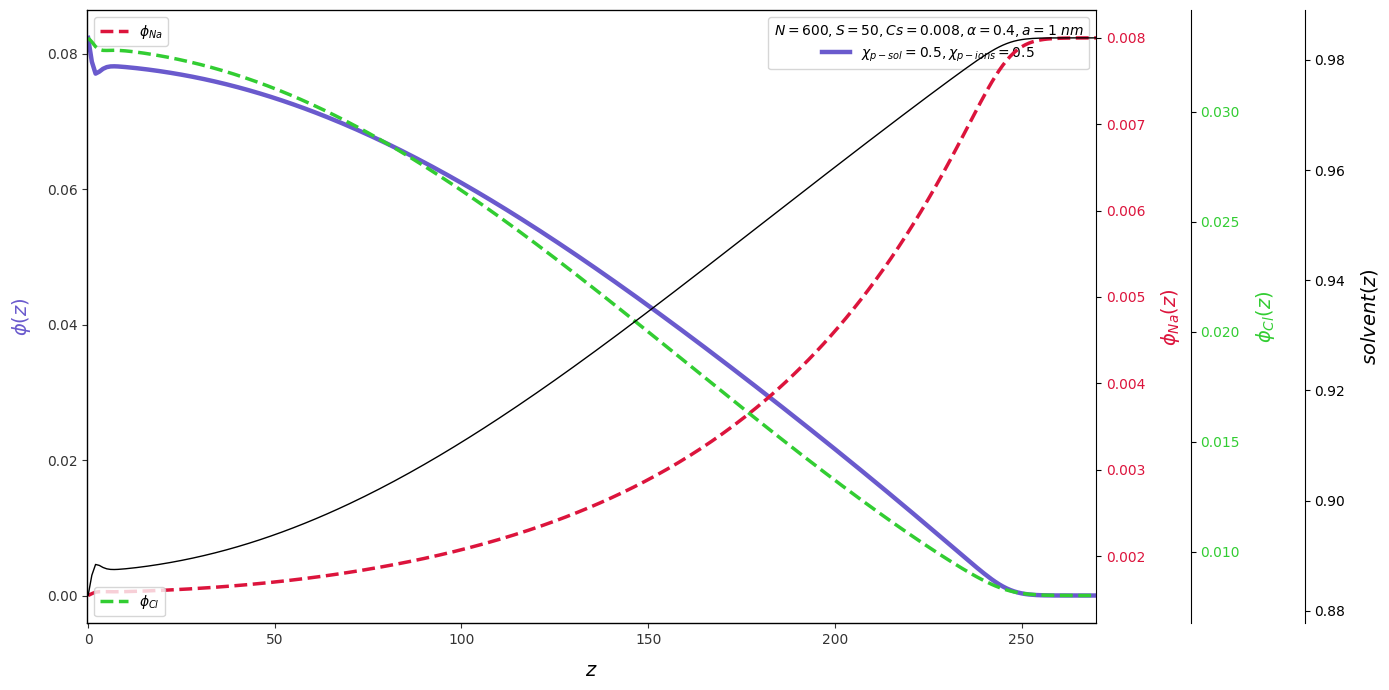

In [20]:
# Создаем фигуру
fig, ax1 = plt.subplots(figsize=(14, 7))  # Основная ось

# Первый график для phi_brush
ax1.plot(phi_brush, color='slateblue', label=f'$\\chi_{{p-sol}} = {chi}, \\chi_{{p-ions}} = {chi_ions}$', linewidth=3.2, linestyle="-")
ax1.set_xlabel("$z$", fontsize=14, labelpad=10)
ax1.set_ylabel("$\\phi(z)$", fontsize=14, labelpad=10, color='slateblue')
ax1.tick_params(axis='y', labelcolor='slateblue')
ax1.set_xlim(-0.2, 270)

# Убираем верхнюю и правую границы
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_color("#333333")
ax1.spines["bottom"].set_color("#333333")
ax1.tick_params(axis='both', which='major', labelsize=10, colors="#333333")

# Вторая ось y для phi_Na
ax2 = ax1.twinx()  # Вторая ось
ax2.plot(phi_Na, color='crimson', label='$\\phi_{Na}$', linewidth=2.5, linestyle="--")
ax2.set_ylabel("$\\phi_{Na}(z)$", fontsize=14, labelpad=10, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')



# Третья ось y для phi_Cl
# Добавляем сдвиг для третьей оси
ax3 = ax1.twinx()  
ax3.spines["right"].set_position(("outward", 68))  # Сдвигаем третью ось на 50 пикселей вправо
ax3.plot(phi_Cl, color='limegreen', label='$\\phi_{Cl}$', linewidth=2.5, linestyle="--")
ax3.set_ylabel("$\\phi_{Cl}(z)$", fontsize=14, labelpad=10, color='limegreen')
ax3.tick_params(axis='y', labelcolor='limegreen')


# Четвертая ось y для концов
# Добавляем сдвиг для четвертой оси
# ax4 = ax1.twinx()  
# ax4.spines["right"].set_position(("outward", 140))  # Сдвигаем третью ось на 50 пикселей вправо
# ax4.plot(phi_end_brush, color='orange', label='$\\phi_{end \\ brush}$', linewidth=2.5, linestyle="-")
# ax4.set_ylabel("$\\phi_{end \\ brush}(z)$", fontsize=14, labelpad=10, color='orange')
# ax4.tick_params(axis='y', labelcolor='orange')

# Пятая ось y для растворителя
# Добавляем сдвиг для пятой оси
ax5 = ax1.twinx()  
ax5.spines["right"].set_position(("outward", 150))  # Сдвигаем третью ось на 50 пикселей вправо
ax5.plot(phi_W, color='black', label='$solvent$', linewidth=1, linestyle="-")
ax5.set_ylabel("$solvent(z)$", fontsize=14, labelpad=10, color='black')
ax5.tick_params(axis='y', labelcolor='black')



# Легенда для первого графика
ax1.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
           title_fontsize=10, loc="upper right")

# Легенда для второго графика
ax2.legend(fontsize=10, loc="upper left")

# Легенда для третьего графика
ax3.legend(fontsize=10, loc="lower left")

# # Легенда для четвертого графика
# ax4.legend(fontsize=10, loc="lower right")


# Убираем лишние отступы
plt.tight_layout()

# Отображаем график
plt.show()


# Наложение плотности полимера и распределения заряда

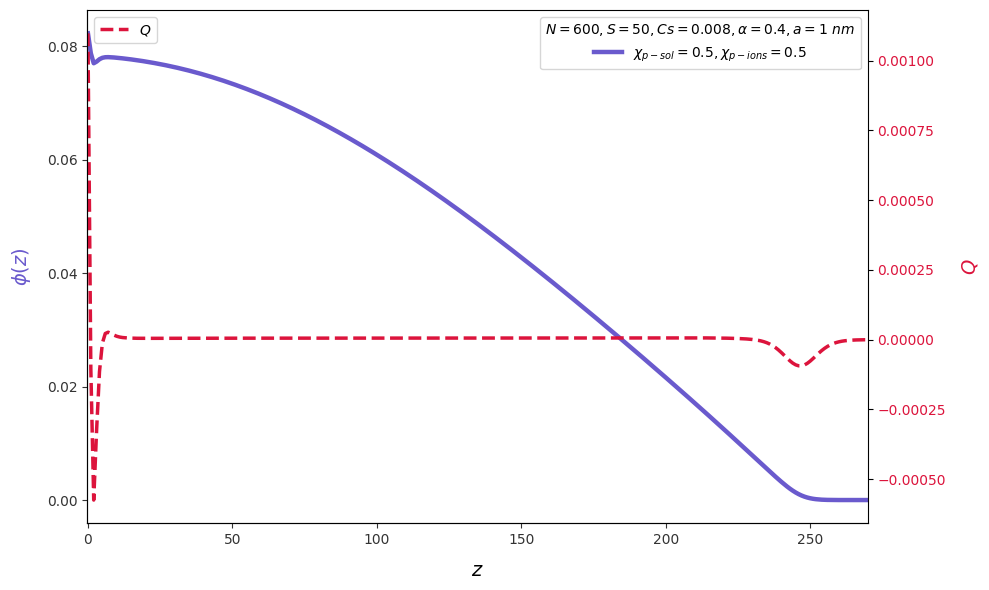

In [19]:
charge_dens = alpha * phi_brush + phi_Na - phi_Cl

fig, ax1 = plt.subplots(figsize=(10, 6))  # Создаем основное окно с первым графиком

# Первый график для phi_brush
ax1.plot(phi_brush, color='slateblue', label=f'$\\chi_{{p-sol}} = {chi}, \\chi_{{p-ions}} = {chi_ions}$', linewidth=3.2, linestyle="-")
ax1.set_xlabel("$z$", fontsize=14, labelpad=10)
ax1.set_ylabel("$\\phi(z)$", fontsize=14, labelpad=10, color='slateblue')
ax1.tick_params(axis='y', labelcolor='slateblue')
ax1.set_xlim(-0.2, 270)

# Добавляем легенду для первого графика
ax1.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, Cs = {Cs}, \\alpha = {alpha}, a = 1 \\ nm$', 
           title_fontsize=10, loc="upper right")

# Убираем верхнюю и правую границы
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_color("#333333")
ax1.spines["bottom"].set_color("#333333")
ax1.tick_params(axis='both', which='major', labelsize=10, colors="#333333")

# Вторая ось y для phi_end_brush
ax2 = ax1.twinx()  # Создаем вторую ось
ax2.plot(q, color='crimson', label='$Q$', linewidth=2.5, linestyle="--")
ax2.set_ylabel("$Q$", fontsize=14, labelpad=10, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Добавляем легенду для второго графика
ax2.legend(fontsize=10, loc="upper left")

# Убираем лишние отступы
plt.tight_layout()

# Отображаем график
plt.show()
